In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Marketing_Data.csv")
data.head(5)

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [4]:
data.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [10]:
data.isnull().sum()

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64

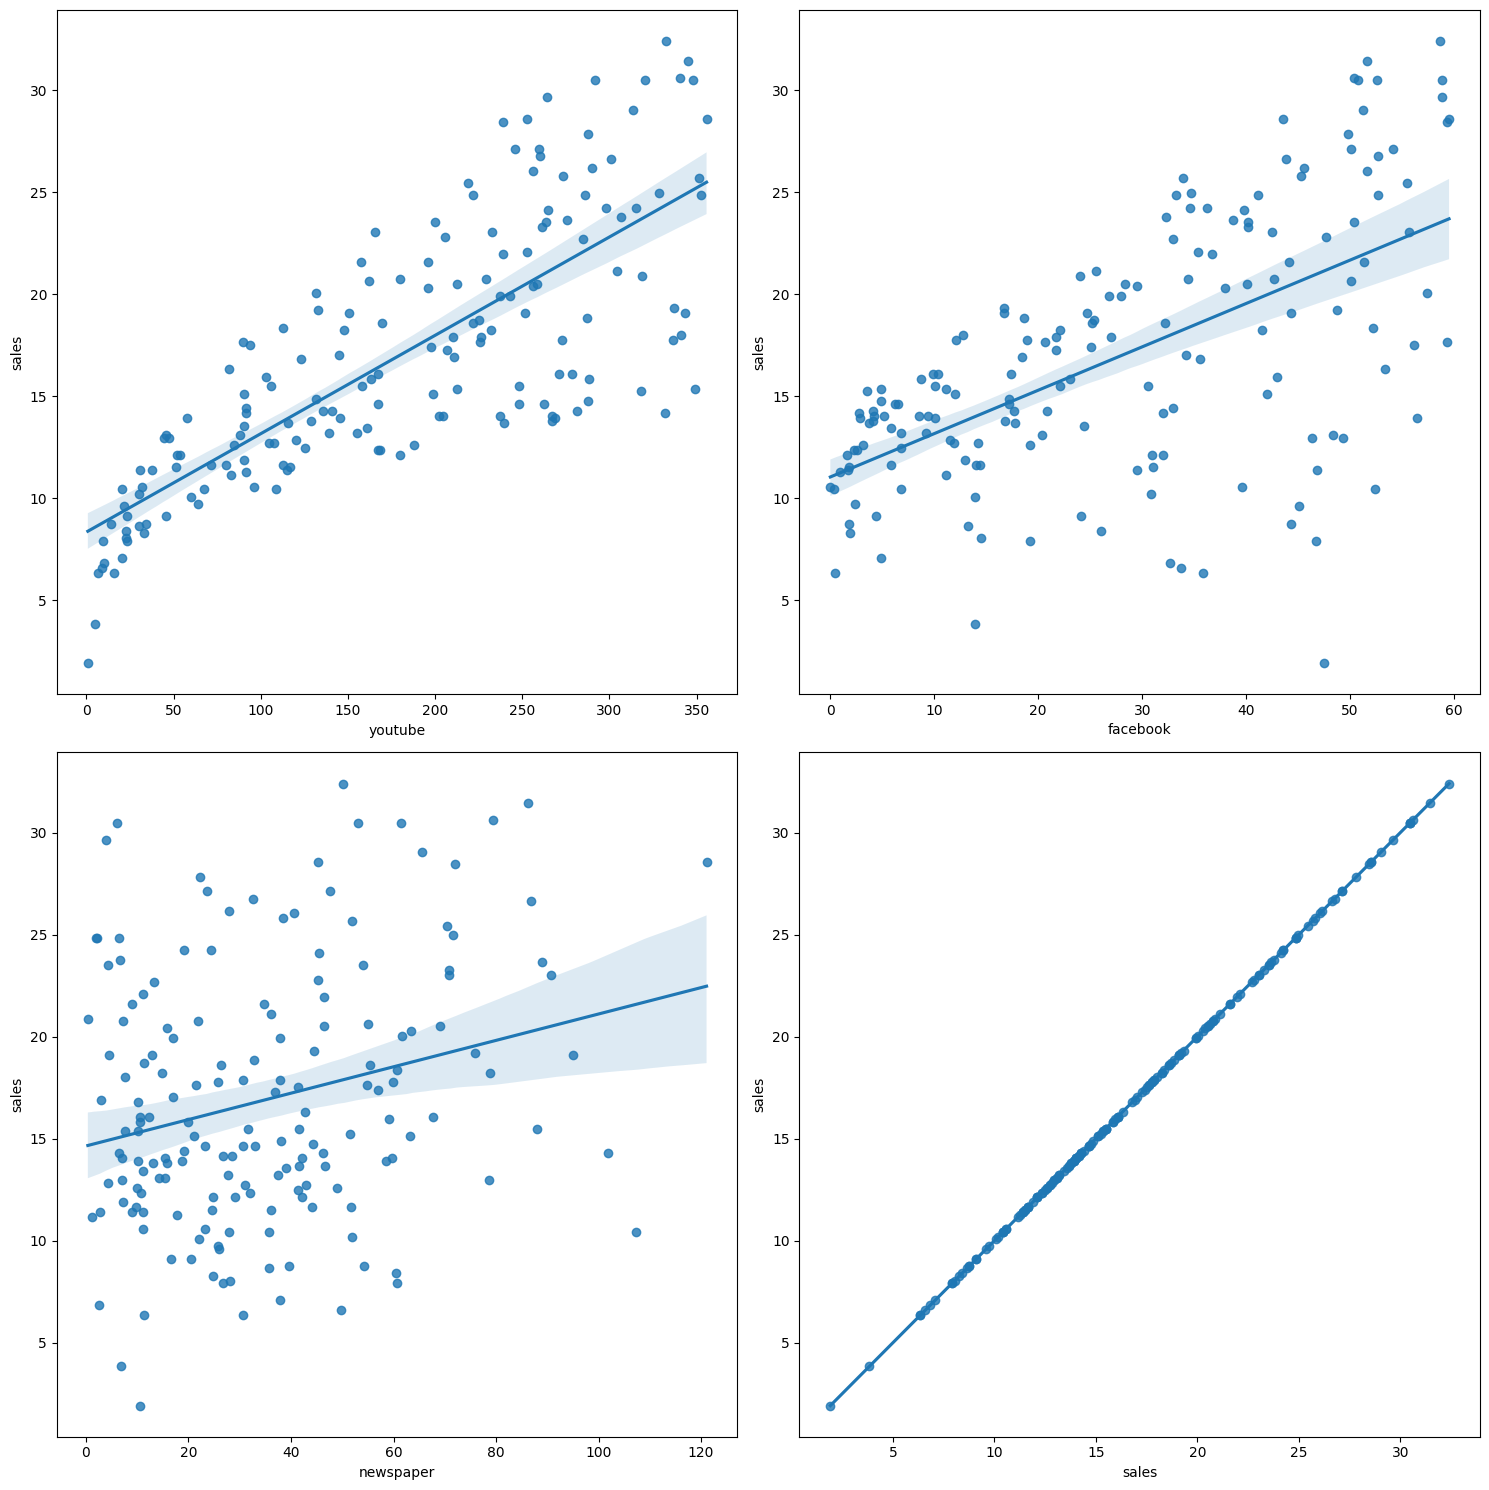

In [13]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(data):
    plt.subplot(2,2,i+1)
    sns.regplot(x=feature,y="sales",data=data)
plt.tight_layout()
plt.show()

In [14]:
data.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


<Axes: >

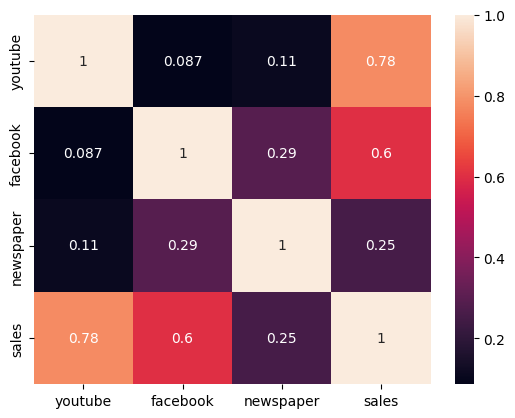

In [17]:
sns.heatmap(data.corr(),annot=True)

In [18]:
from sklearn.model_selection import train_test_split
x=data.drop(["sales"],axis=1)
y=data["sales"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, x, y, cv=5, scoring='r2')
print("Cross-validation scores:", scores)
print("Mean R^2:", np.mean(scores))

Cross-validation scores: [0.91818687 0.88662841 0.85350533 0.89992827 0.90323431]
Mean R^2: 0.8922966369742292
